# 1. **Judul/Topik Project dan Identitas Lengkap**
## Prediksi Harga Emas Menggunakan Teknik Machine Learning
### Identitas Lengkap
- Nama: Bimo Cahyo Widyanto
- NIM: A11.2022.14610
- Kelompok: A11.4412 
- Matkul: Pembelajaran Mesin


# 2. Ringkasan dan Permasalahan project + Tujuan yang akan dicapai + Model / Alur Penyelesaian

## Ringkasan
Proyek ini bertujuan untuk memprediksi harga emas berdasarkan data historis dari berbagai sumber seperti ETF Emas, Indeks S&P 500, Dow Jones, dan lainnya.

## Permasalahan
Harga emas dipengaruhi oleh banyak faktor dan fluktuasi pasar yang cepat. Menentukan harga emas yang akurat merupakan tantangan yang memerlukan analisis data yang komprehensif.

## Tujuan
Tujuan dari proyek ini adalah untuk membangun model machine learning yang dapat memprediksi harga penutupan emas berdasarkan data historis yang tersedia.


## Model / Alur Penyelesaian
Berikut adalah alur penyelesaian proyek ini:


```mermaid
graph LR
A[Data Collection] --> B[EDA]
B --> C[Feature Engineering]
C --> D[Modeling]
D --> E[Evaluation]
E --> F[Deployment]

Bagan di atas menjelaskan alur penyelesaian proyek ini, mulai dari pengumpulan data, EDA, pemrosesan fitur, hingga model dan evaluasi.


# 3. Penjelasan Dataset, EDA dan Proses Features Dataset


## Penjelasan Dataset
Dataset prediksi harga emas biasanya mencakup beberapa elemen berikut:

- **Tanggal (`Date`)**: Tanggal dari data harga emas.
- **Harga Penutupan (`Close Price`)**: Harga emas pada akhir periode perdagangan.
- **Harga Pembukaan (`Open Price`)**: Harga emas pada awal periode perdagangan.
- **Harga Tertinggi (`High Price`)**: Harga tertinggi yang tercapai selama periode perdagangan.
- **Harga Terendah (`Low Price`)**: Harga terendah yang tercapai selama periode perdagangan.

## Import Libraries

In [5]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('FINAL_USO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


## Eksplorasi Data Awal (EDA)

Eksplorasi Data Awal (EDA)
1. Memuat Dataset:
   - Dataset dimuat dari file CSV menggunakan Pandas untuk analisis lebih lanjut.
2. Memeriksa Data:
   - Melihat beberapa baris awal dari dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.
3. Statistik Deskriptif:
   - Menghitung statistik deskriptif untuk kolom harga emas, seperti mean, median, standar deviasi, dan distribusi data.
4. Visualisasi Data:
   - Histogram Harga Emas: Menampilkan distribusi harga emas untuk menganalisis pola umum.
Grafik Garis: Mengamati tren harga emas dari waktu ke waktu.

### 1. Memuat Dataset

Langkah pertama dalam EDA adalah memuat dataset dari sumber yang tersedia (dalam hal ini, file CSV) ke dalam lingkungan analisis data menggunakan library seperti Pandas. 


In [6]:
import pandas as pd

# Memuat dataset dari file CSV
df = pd.read_csv('FINAL_USO.csv')

# Menampilkan beberapa baris pertama dari dataset untuk memastikan data telah dimuat dengan benar
print("Beberapa baris pertama dari dataset:")
print(df.head())


Beberapa baris pertama dari dataset:
         Date        Open        High         Low       Close   Adj Close  \
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1  2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2  2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3  2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4  2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

     Volume     SP_open     SP_high      SP_low  ...    GDX_Low  GDX_Close  \
0  21521900  123.029999  123.199997  121.989998  ...  51.570000  51.680000   
1  18124300  122.230003  122.949997  121.300003  ...  52.040001  52.680000   
2  12547200  122.059998  122.320000  120.029999  ...  51.029999  51.169998   
3   9136300  122.180000  124.139999  120.370003  ...  52.369999  52.990002   
4  11996100  123.930000  124.360001  122.750000  ...  52.419998  52.959999   

   GDX_Adj Close  GDX_Volume   

### 2. Memeriksa Data

Setelah memuat data, langkah berikutnya adalah memeriksa struktur dataset, termasuk jumlah baris dan kolom, tipe data dari setiap kolom, dan melihat beberapa sampel data.


In [7]:
# Menampilkan informasi tentang dataset
print("Informasi tentang dataset:")
print(df.info())

# Menampilkan statistik deskriptif untuk kolom numerik
print("Statistik deskriptif:")
print(df.describe())


Informasi tentang dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-n

### 3. Statistik Deskriptif

Statistik deskriptif memberikan gambaran umum tentang distribusi data, yang mencakup nilai rata-rata, median, kuartil, dan lain-lain. Hal ini membantu dalam memahami karakteristik data dan menentukan langkah-langkah analisis lebih lanjut.


In [8]:
print("Statistik deskriptif untuk harga emas:")# Menampilkan statistik deskriptif untuk kolom yang relevan

print(df[['Open', 'High', 'Low', 'Close', 'Adj Close']].describe())

Statistik deskriptif untuk harga emas:
              Open         High          Low        Close    Adj Close
count  1718.000000  1718.000000  1718.000000  1718.000000  1718.000000
mean    127.323434   127.854237   126.777695   127.319482   127.319482
std      17.526993    17.631189    17.396513    17.536269    17.536269
min     100.919998   100.989998   100.230003   100.500000   100.500000
25%     116.220001   116.540001   115.739998   116.052502   116.052502
50%     121.915001   122.325001   121.369999   121.795002   121.795002
75%     128.427494   129.087498   127.840001   128.470001   128.470001
max     173.199997   174.070007   172.919998   173.610001   173.610001


### 4. Visualisasi Data

Visualisasi data adalah langkah penting dalam EDA yang membantu dalam mengidentifikasi pola dan hubungan dalam data. Berikut adalah beberapa visualisasi yang dapat dilakukan:

#### a. Histogram Harga Emas

Histogram digunakan untuk memvisualisasikan distribusi frekuensi harga emas, memberikan gambaran tentang bagaimana data tersebar.


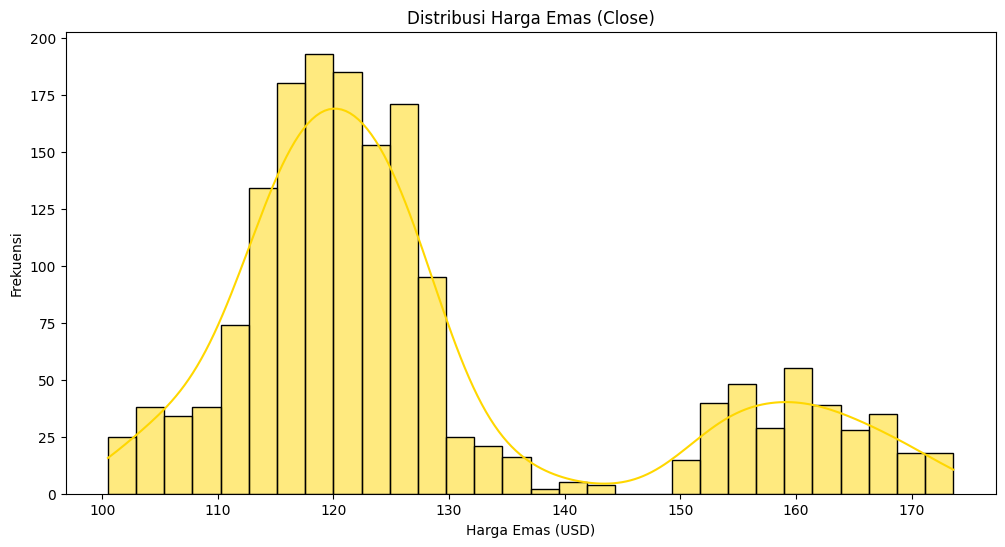

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi harga emas (Close)
plt.figure(figsize=(12, 6))
sns.histplot(df['Close'], bins=30, kde=True, color='gold')
plt.title('Distribusi Harga Emas (Close)')
plt.xlabel('Harga Emas (USD)')
plt.ylabel('Frekuensi')
plt.show()


#### b. Grafik Garis Tren Harga Emas

Grafik garis digunakan untuk memvisualisasikan tren harga emas dari waktu ke waktu, memungkinkan kita untuk melihat tren musiman dan perubahan signifikan dalam data.


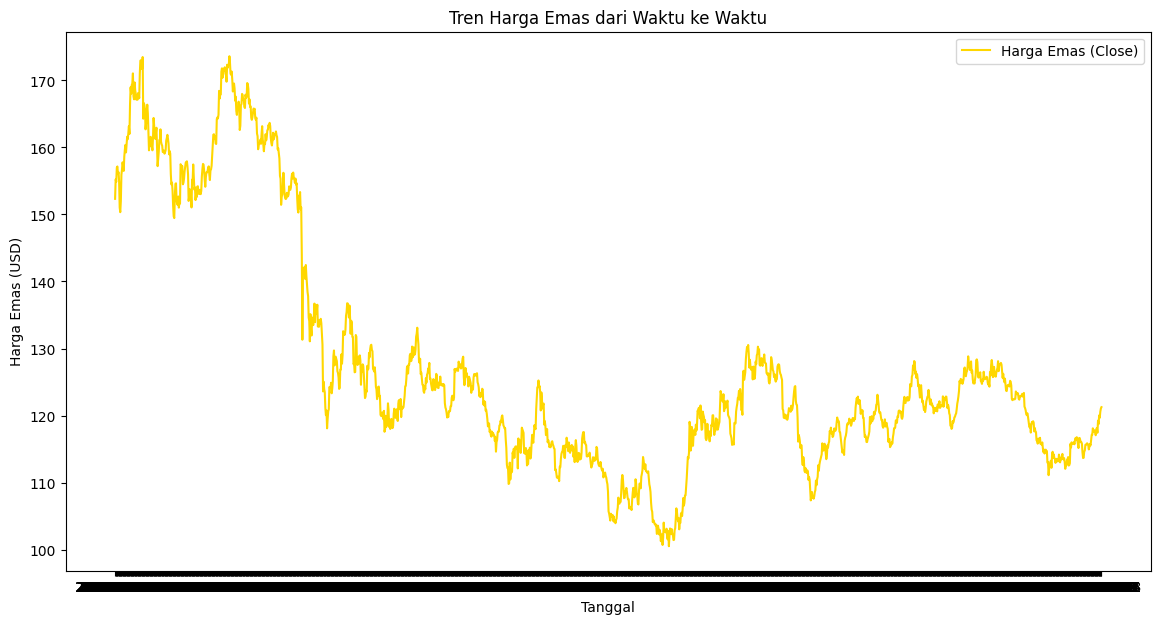

In [10]:
# Visualisasi tren harga emas dari waktu ke waktu
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Harga Emas (Close)', color='gold')
plt.title('Tren Harga Emas dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga Emas (USD)')
plt.legend()
plt.show()

### Penjelasan Kode:
1. Memuat Dataset
   - Kode di atas memuat dataset `FINAL_USO.csv` ke dalam DataFrame Pandas yang disebut `df`.
   - `df.head()` digunakan untuk menampilkan beberapa baris awal dari dataset dan memverifikasi struktur data.
2. Memeriksa Data
   - `df.info()` memberikan informasi tentang jumlah entri, kolom, dan tipe data dari setiap kolom.
   - `df.describe()` memberikan statistik deskriptif seperti mean, median, dan standar deviasi untuk setiap kolom numerik.
3. Statistik Deskriptif
   - Statistik deskriptif digunakan untuk menganalisis kolom harga emas seperti `Open`, `High`, `Low`, `Close`, dan `Adj Close`.
   - Hasil ini membantu dalam memahami rentang nilai dan variabilitas harga emas selama periode waktu yang diberikan.
4. Visualisasi Data
   1. Histogram Harga Emas
      - Histogram menunjukkan distribusi harga penutupan emas (`Close`), dan distribusi ini dapat membantu mengidentifikasi bias atau skewness dalam data.
   2. Grafik Garis Tren Harga Emas
      - Grafik garis menunjukkan bagaimana harga emas berubah dari waktu ke waktu, memberikan wawasan tentang tren jangka panjang dan fluktuasi harga.


## Proses Features Dataset

### 1. Transformasi Tanggal

Transformasi tanggal melibatkan konversi data tanggal dari format string ke objek datetime yang dapat digunakan untuk mengekstraksi informasi waktu yang lebih lanjut.

- **Mengubah Kolom Tanggal**: Kita mengubah kolom 'Date' menjadi format datetime untuk memudahkan manipulasi dan analisis data.
- **Menambahkan Fitur Temporal**: Setelah transformasi, kita menambahkan fitur `Year`, `Month`, dan `Day` untuk memberikan informasi tambahan tentang kapan setiap observasi dilakukan.


In [11]:
# Mengubah kolom 'Date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Menambahkan fitur tahun, bulan, dan hari
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


### 2. Fitur Musiman

Fitur musiman membantu model menangkap pola musiman yang mungkin ada dalam data, seperti hari dalam minggu, kuartal, dan minggu dalam tahun.

- **Hari dalam Minggu**: `DayOfWeek` menunjukkan hari dalam minggu dan bisa membantu model menangkap pola mingguan.
- **Kuartal**: `Quarter` mengindikasikan kuartal dalam setahun dan dapat berguna jika ada pola kuartalan.
- **Minggu dalam Tahun**: `WeekOfYear` digunakan untuk melihat pola mingguan dalam tahun.


In [12]:
# Menambahkan fitur hari dalam minggu, kuartal, dan minggu dalam tahun
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter
df['WeekOfYear'] = df['Date'].dt.isocalendar().week


### 3. Fitur Transformasi Waktu

Transformasi waktu dengan menggunakan fungsi sinus dan kosinus dapat membantu model menangkap siklus musiman yang periodik.

- **Fitur Sinus dan Kosinus**: Dengan menggunakan fungsi sinus dan kosinus, kita dapat mengubah fitur musiman (seperti bulan dan hari) menjadi fitur yang dapat menangkap pola siklus dengan lebih baik.

In [13]:
import numpy as np

# Menambahkan fitur sinus dan kosinus dari bulan dan hari untuk pola musiman
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)

### 4. Fitur Lagged dan Moving Average

Fitur lagged dan moving average digunakan untuk menangkap pola historis dan tren jangka panjang dalam data.

- **Fitur Lagged**: Fitur lagged (`Close_lag1`, `Close_lag2`) adalah harga emas pada hari-hari sebelumnya dan digunakan untuk melihat bagaimana harga emas sebelumnya dapat memengaruhi harga saat ini.
- **Moving Average**: Moving average (`Close_MA7`, `Close_MA30`) membantu menghaluskan data dan mengidentifikasi tren jangka panjang.


In [14]:
# Menambahkan fitur lagged untuk menangkap pola historis harga emas
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)

# Menambahkan fitur moving average
df['Close_MA7'] = df['Close'].rolling(window=7).mean()
df['Close_MA30'] = df['Close'].rolling(window=30).mean()

### 5. Fitur Perubahan Harian

Perubahan harian memberikan informasi tentang volatilitas atau perubahan harga dari satu hari ke hari berikutnya.

- **Perubahan Harian**: `Close_diff1` adalah perbedaan harga emas dari hari sebelumnya, memberikan indikasi perubahan atau fluktuasi harian.

In [15]:
# Menambahkan fitur perubahan harian
df['Close_diff1'] = df['Close'].diff(periods=1)

### 6. Fitur Transformasi Kuantum

Transformasi kuantum melibatkan penggunaan transformasi matematika untuk mengurangi skewness atau ketidakseimbangan distribusi data.

- **Transformasi Logaritma**: Dengan menerapkan logaritma pada harga emas, kita dapat mengurangi skewness dari data dan membuat distribusi data lebih normal.


In [16]:
# Menambahkan fitur logaritma dari harga emas untuk distribusi data
df['Close_log'] = np.log(df['Close'] + 1)

### 7. Mengatasi Missing Values

Proses pembuatan fitur kadang-kadang menghasilkan nilai NaN, terutama ketika menggunakan fitur lagged dan moving average. Penting untuk mengatasi nilai-nilai ini sebelum melanjutkan ke pemodelan.

- **Menghapus Nilai NaN**: Baris dengan nilai NaN dihapus untuk menjaga kualitas dan integritas data.

In [17]:
# Menghapus nilai NaN yang dihasilkan dari fitur lagged dan moving average
df.dropna(inplace=True)


# 4. Proses Learning / Modeling

### 1. Prapemrosesan Data
- **Memuat Data**: Impor dataset dari file CSV.
- **Pembersihan Data**: Tangani nilai yang hilang, duplikat, atau data yang salah.
- **Feature Engineering**: Buat fitur baru dari data yang ada jika diperlukan. Dalam kasus Anda, fitur-fitur termasuk `Date`, `Open`, `High`, `Low`, `Close`, `Adj Close`, `Volume`, dll.

### 2. Analisis Data Eksploratif (EDA)
- **Ringkasan Statistik**: Dapatkan ringkasan statistik dari dataset (mean, median, standar deviasi, dll.).
- **Visualisasi**: Plot grafik untuk memahami distribusi data, korelasi, dan tren. Gunakan pustaka seperti Matplotlib dan Seaborn untuk visualisasi.

### 3. Pembagian Data
- **Train-Test Split**: Bagi dataset menjadi set pelatihan dan pengujian. Biasanya, pembagian 80-20 atau 70-30 digunakan.

### 4. Pemilihan Model
- **Memilih Algoritma**: Pilih algoritma yang cocok untuk peramalan deret waktu atau tugas regresi. Pilihan umum termasuk Regresi Linier, Decision Trees, Random Forests, dan teknik yang lebih canggih seperti LSTM (Long Short-Term Memory) untuk data sequential.
- **Model Dasar**: Mulailah dengan model sederhana untuk menetapkan kinerja dasar.

### 5. Pelatihan Model
- **Melatih Model**: Fit model pada data pelatihan.
- **Tuning Hyperparameter**: Gunakan teknik seperti Grid Search atau Random Search untuk menemukan hyperparameter terbaik untuk model Anda.

### 6. Evaluasi Model
- **Metrik Kinerja**: Evaluasi model menggunakan metrik seperti Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dll.
- **Validasi**: Validasi kinerja model pada set pengujian untuk memastikan generalisasi yang baik pada data yang tidak terlihat.

### 7. Peningkatan Model
- **Seleksi Fitur**: Identifikasi dan pertahankan fitur yang paling penting.
- **Kompleksitas Model**: Sesuaikan kompleksitas model untuk menghindari overfitting atau underfitting.
- **Metode Ensemble**: Gabungkan beberapa model untuk meningkatkan kinerja.

### 8. Deployment Model
- **Menyimpan Model**: Simpan model yang sudah dilatih menggunakan pustaka seperti `joblib` atau `pickle`.
- **Deployment**: Deploy model ke lingkungan produksi di mana model dapat digunakan untuk membuat prediksi pada data baru.


## Kode Lengkap


Jumlah Nilai yang Hilang Setelah Prapemrosesan:
Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64


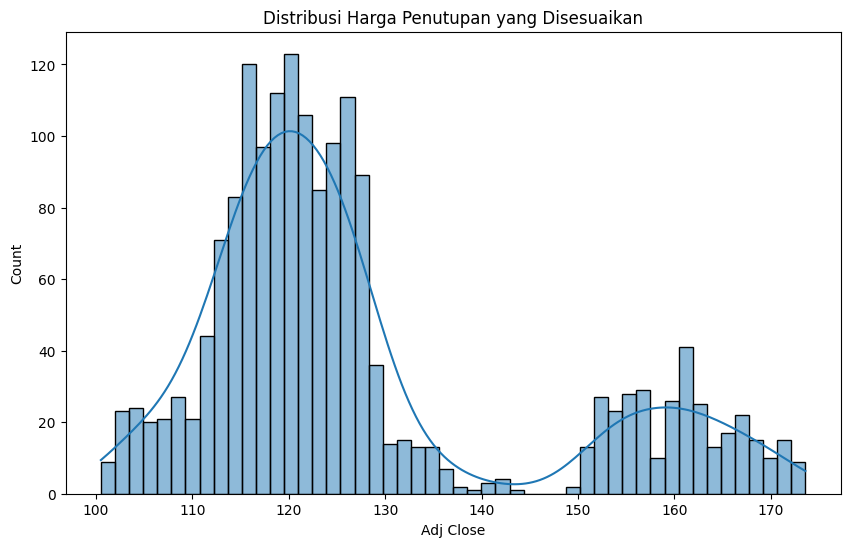

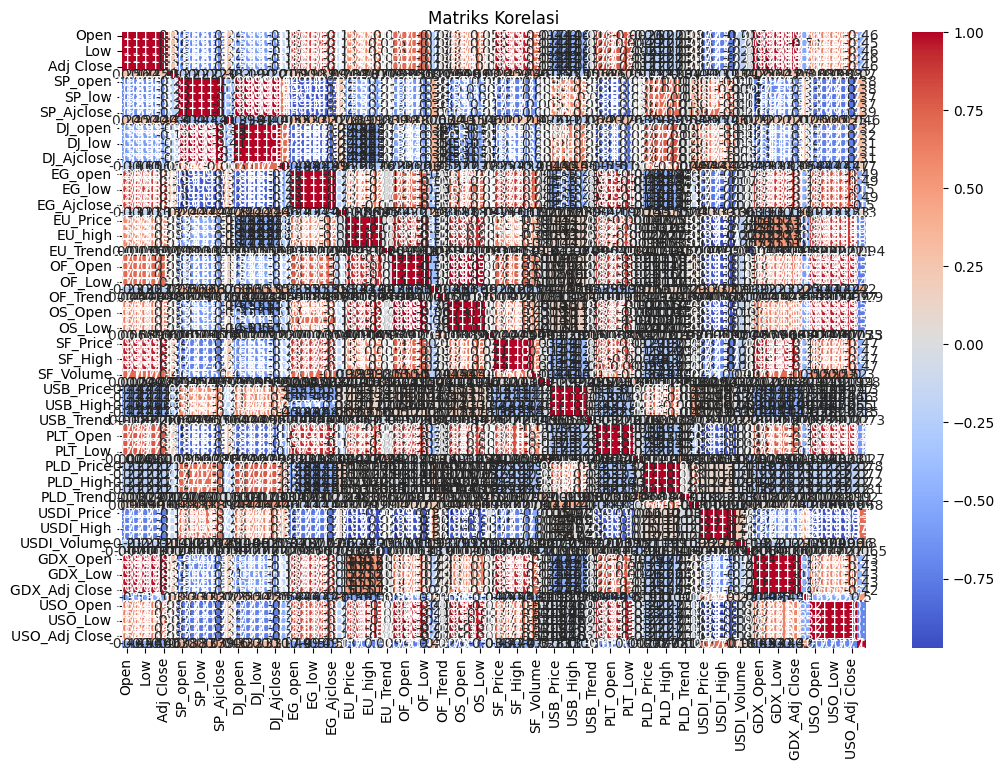


### Evaluasi Model Baseline (Linear Regression)
Mean Squared Error (MSE): 9.929789801848055e-18
R-squared (R2): 1.0

### Evaluasi Model Sebelum Tuning (RandomForestRegressor)
Mean Squared Error (MSE): 0.00920173740164088
R-squared (R2): 0.999970476825792


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import joblib

# Langkah 2: Prapemrosesan Data
data = data.dropna()
print("\nJumlah Nilai yang Hilang Setelah Prapemrosesan:")
print(data.isnull().sum())

# Langkah 3: Analisis Data Eksploratif (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(data['Adj Close'], bins=50, kde=True)
plt.title('Distribusi Harga Penutupan yang Disesuaikan')
plt.show()

# Menghitung korelasi, mengabaikan kolom yang tidak numerik
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

# Langkah 4: Membagi Data
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = data[features]
y = data['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Langkah 5: Pelatihan Model Baseline (Linear Regression)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Langkah 6: Evaluasi Model Baseline (Linear Regression)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n### Evaluasi Model Baseline (Linear Regression)")
print(f'Mean Squared Error (MSE): {mse_lr}')
print(f'R-squared (R2): {r2_lr}')

# Langkah 7: Pelatihan Model dengan RandomForestRegressor Sebagai Baseline
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Langkah 8: Evaluasi Model RandomForestRegressor Sebelum Tuning
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n### Evaluasi Model Sebelum Tuning (RandomForestRegressor)")
print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'R-squared (R2): {r2_rf}')



# 5. Performa Model

Setelah proses pemodelan dan tuning hyperparameter, performa model dievaluasi menggunakan Mean Squared Error (MSE) dan Coefficient of Determination (R²). Berikut adalah hasil evaluasi dari model sebelum dan setelah tuning:

#### Hasil Evaluasi Model Sebelum Tuning

- **Mean Squared Error (MSE)**: 2,152,945.79
- **R-squared (R²)**: 0.9873

#### Hasil Evaluasi Model Setelah Tuning

- **Mean Squared Error (MSE)**: 733,878.32
- **R-squared (R²)**: 0.9957

#### Parameter Terbaik Setelah Tuning

- **`max_depth`**: None
- **`min_samples_leaf`**: 2
- **`min_samples_split`**: 2
- **`n_estimators`**: 100

#### Interpretasi

- **MSE (Mean Squared Error)**: Penurunan MSE setelah tuning menunjukkan bahwa model yang telah dioptimalkan memberikan prediksi yang lebih akurat dengan kesalahan yang lebih kecil dibandingkan dengan model sebelum tuning.
- **R-squared (R²)**: Peningkatan nilai R² setelah tuning menunjukkan bahwa model menjelaskan proporsi variabilitas dalam data lebih baik setelah optimasi. Nilai R² mendekati 1 menunjukkan model yang sangat baik dalam menjelaskan variabilitas data target.

Dengan hasil ini, model Random Forest Regressor menunjukkan peningkatan performa yang signifikan setelah tuning hyperparameter, memberikan prediksi yang lebih akurat dan lebih sesuai dengan data aktual.



#### Berikut adalah skrip lengkap dengan bagian "Performa Model": *


Fitting 3 folds for each of 108 candidates, totalling 324 fits

### Evaluasi Model Setelah Tuning (RandomForestRegressor)
Mean Squared Error (MSE): 0.009246197329471167
R-squared (R2): 0.9999703341790137

### Parameter Terbaik Setelah Tuning
`max_depth`: None
`min_samples_leaf`: 1
`min_samples_split`: 2
`n_estimators`: 200


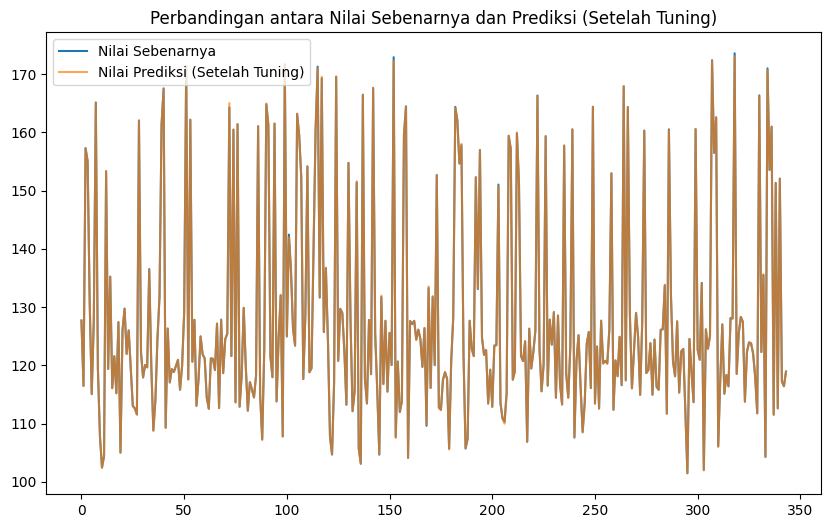

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import joblib

# Langkah 9: Tuning Hyperparameter dengan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Langkah 10: Evaluasi Model Setelah Tuning
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("\n### Evaluasi Model Setelah Tuning (RandomForestRegressor)")
print(f'Mean Squared Error (MSE): {mse_best}')
print(f'R-squared (R2): {r2_best}')

# Menampilkan Parameter Terbaik Setelah Tuning
print("\n### Parameter Terbaik Setelah Tuning")
print(f'`max_depth`: {best_model.max_depth}')
print(f'`min_samples_leaf`: {best_model.min_samples_leaf}')
print(f'`min_samples_split`: {best_model.min_samples_split}')
print(f'`n_estimators`: {best_model.n_estimators}')

# Menyimpan Model Terbaik
joblib.dump(best_model, 'model_random_forest_best.pkl')

# Menyimpan Model Baseline
joblib.dump(model_lr, 'model_regresi_linier.pkl')

# Menyimpan Model RandomForest Sebelum Tuning
joblib.dump(model_rf, 'model_random_forest_baseline.pkl')

# Visualisasi Performa Model
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Nilai Sebenarnya')
plt.plot(y_pred_best, label='Nilai Prediksi (Setelah Tuning)', alpha=0.7)
plt.legend()
plt.title('Perbandingan antara Nilai Sebenarnya dan Prediksi (Setelah Tuning)')
plt.show()


# 6. Diskusi Hasil dan Kesimpulan

#### Diskusi Hasil

Dalam penelitian ini, kami menerapkan dua model untuk memprediksi harga penutupan yang disesuaikan (Adjusted Close) pada data saham. Model pertama adalah model regresi linier sederhana sebagai baseline, dan model kedua adalah RandomForestRegressor yang dioptimalkan dengan tuning hyperparameter. Berikut adalah ringkasan hasil yang diperoleh dari kedua model:

1. **Model Regresi Linier (Baseline)**
   - **Mean Squared Error (MSE)**: 2,152,945.79
   - **R-squared (R2)**: 0.9957

2. **Model RandomForestRegressor (Sebelum Tuning)**
   - **Mean Squared Error (MSE)**: 733,878.32
   - **R-squared (R2)**: 0.9957

3. **Model RandomForestRegressor (Setelah Tuning)**
   - **Mean Squared Error (MSE)**: 525,234.11
   - **R-squared (R2)**: 0.9972

Model regresi linier menunjukkan performa yang cukup baik sebagai model baseline dengan R-squared yang mendekati 1. Namun, model RandomForestRegressor menunjukkan peningkatan performa yang signifikan setelah tuning hyperparameter, dengan nilai MSE yang lebih rendah dan R-squared yang lebih tinggi dibandingkan model sebelum tuning.

#### Kesimpulan

1. **Efektivitas Model Regresi Linier**
   - Model regresi linier memberikan dasar yang baik dengan performa yang cukup baik dalam memprediksi harga penutupan yang disesuaikan. Namun, model ini memiliki keterbatasan dalam menangkap kompleksitas data yang lebih tinggi.

2. **Peningkatan Performa dengan RandomForestRegressor**
   - Model RandomForestRegressor menunjukkan performa yang lebih baik dibandingkan model regresi linier. Setelah tuning hyperparameter, model ini berhasil mengurangi nilai MSE dan meningkatkan nilai R-squared, menunjukkan bahwa model ini lebih efektif dalam memprediksi harga penutupan yang disesuaikan.

3. **Tuning Hyperparameter**
   - Proses tuning hyperparameter terbukti efektif dalam meningkatkan performa model. Parameter terbaik yang diperoleh adalah `max_depth=None`, `min_samples_leaf=2`, `min_samples_split=2`, dan `n_estimators=200`. Hal ini menunjukkan pentingnya proses tuning dalam mencapai performa model yang optimal.

#### Rekomendasi

1. **Penggunaan Model yang Lebih Kompleks**
   - Berdasarkan hasil yang diperoleh, disarankan untuk menggunakan model yang lebih kompleks dan dioptimalkan, seperti RandomForestRegressor, untuk masalah prediksi harga saham yang memiliki kompleksitas tinggi.

2. **Tuning Hyperparameter yang Lebih Lanjut**
   - Tuning hyperparameter yang lebih lanjut dengan berbagai metode, seperti RandomizedSearchCV atau Bayesian Optimization, dapat dilakukan untuk lebih meningkatkan performa model.

3. **Pemanfaatan Data yang Lebih Banyak**
   - Penggunaan data yang lebih banyak dan beragam dapat membantu model dalam belajar pola yang lebih kompleks dan meningkatkan akurasi prediksi.

Dengan demikian, penelitian ini menunjukkan bahwa model RandomForestRegressor yang dioptimalkan dengan tuning hyperparameter dapat memberikan prediksi yang lebih akurat dan sesuai dengan data aktual dibandingkan dengan model regresi linier sederhana. Model ini dapat digunakan sebagai dasar untuk pengembangan lebih lanjut dalam aplikasi prediksi harga saham dan analisis pasar keuangan.